#Discrete CMAC with 1D sine wave

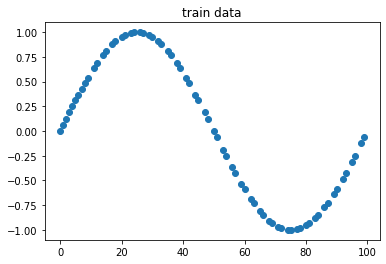

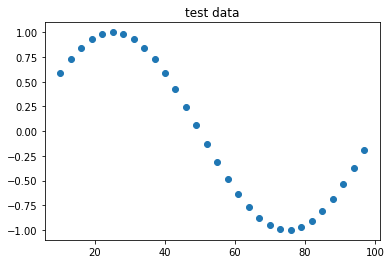

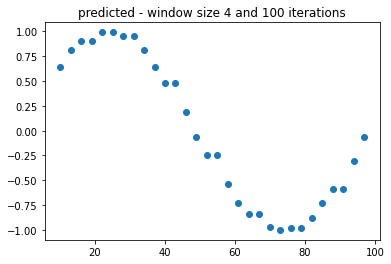

accuracy 0.9435987918012967


In [ ]:
import math
# Write code for Discrete CMAC
wavelength = 100
#input data
x = np.arange(0,100,1)
y = np.sin(2*np.pi*(x/wavelength))
x_test = x[10::3]  
x_train = np.asarray(list(set(x)-set(x_test)))
y_test= np.sin(2*np.pi*(x_test/wavelength))
y_train = np.sin(2*np.pi*(x_train/wavelength))
plt.scatter(x_train, y_train)
plt.title("train data")
plt.show()
plt.scatter(x_test, y_test)
plt.title("test data")
plt.show()

#weights
weights = np.random.rand(35)
learning_rate = 0.1
window_size = 4

#grouping data
grp_x = np.floor(x_train / window_size).astype(int)

def predict(data,grp):
  y_pred = weights[grp]
  return y_pred

def d_cmac_train(x_data,y_data,window_size,weights,learning_rate):
    weights[grp_x] += learning_rate * (y_data - predict(x_data,grp_x))

#training for 100 iterations
for i in range(100):
  d_cmac_train(x_train,y_train,window_size,weights,learning_rate)

grp_x_test = np.floor(x_test / window_size).astype(int)
y_pred = predict(x_test,grp_x_test)
plt.scatter(x_test, y_pred)
plt.title("CASE1: predicted - window size 4 and 100 iterations")
plt.show()

#accuracy

accuracy = 1- np.sum(np.abs(y_pred-y_test))/len(y_pred)
print("accuracy",accuracy)

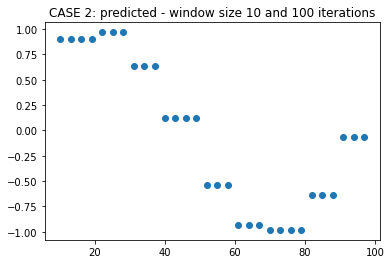

accuracy 0.8389061204965865


In [ ]:
weights = np.random.rand(35)
window_size = 10
#grouping data
grp_x = np.floor(x_train / window_size).astype(int)
#training for 100 iterations
for i in range(100):
  d_cmac_train(x_train,y_train,window_size,weights,learning_rate)

grp_x_test = np.floor(x_test / window_size).astype(int)
y_pred = predict(x_test,grp_x_test)
plt.scatter(x_test, y_pred)
plt.title("CASE 2: predicted - window size 10 and 100 iterations")
plt.show()

#accuracy

accuracy = 1- np.sum(np.abs(y_pred-y_test))/len(y_pred)
print("accuracy",accuracy)

INFERENCES:


Increase in window area(i.e increase in generalization) decreases accuracy


Increase in iterations(i.e time) increases accuracy


Once converges, the performance does not vary much.

#Continuous CMAC by allowing partial cell overlap

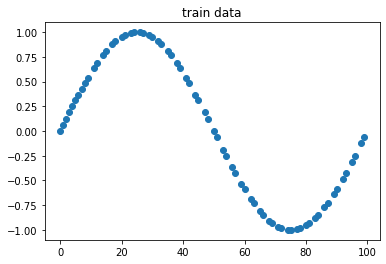

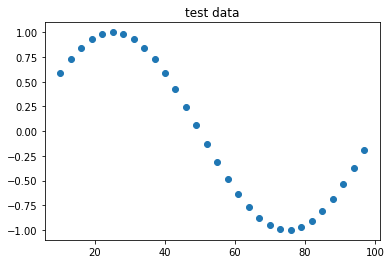

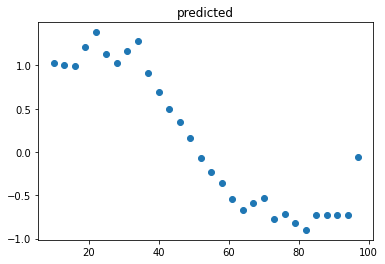

accuracy 0.8136379763853739


In [ ]:
import math
# Write code for Continuous CMAC
wavelength = 100
#input data
x = np.arange(0,100,1)
y = np.sin(2*np.pi*(x/wavelength))
x_test = x[10::3]  
x_train = np.asarray(list(set(x)-set(x_test)))
y_test= np.sin(2*np.pi*(x_test/wavelength))
y_train = np.sin(2*np.pi*(x_train/wavelength))
plt.scatter(x_train, y_train)
plt.title("train data")
plt.show()
plt.scatter(x_test, y_test)
plt.title("test data")
plt.show()

#weights
weights = np.random.rand(35)
learning_rate = 0.1
window_size = 4
overlap = 2  #slides through partial window
#grouping train data
grp_x = np.floor(x_train / window_size).astype(int)

def predict(data,grp):
  temp = weights[grp]
  for i in range(len(weights[grp])):
    if i+window_size < len(temp):
      temp[i:i+window_size] = np.sum(temp[i:i+window_size])/window_size
      i += overlap
  y_pred = temp
  return y_pred

def d_cmac_train(x_data,y_data,window_size,weights,learning_rate):
    weights[grp_x] += learning_rate * (y_data - predict(x_data,grp_x))

for i in range(50):
  d_cmac_train(x_train,y_train,window_size,weights,learning_rate)

#grouping test data
grp_x_test = np.floor(x_test / window_size).astype(int)
y_pred = predict(x_test,grp_x_test)
plt.scatter(x_test, y_pred)
plt.title("predicted")
plt.show()

#accuracy

accuracy = 1- np.sum(np.abs(y_pred-y_test))/len(y_pred)
print("accuracy",accuracy)

COMPARISON:

Continuous CMAC converges quicker but less accuracy whereas Discrete CMAC converges slower with better accuracy